<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

The objective of this Jupyter Notebook is to provide an example of how similarity ranking/searching works. Similarity ranking is one of the tasks that can be used in Natural Language Processing (NLP).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

import nltk # Natural Langage Toolkit
from nltk import word_tokenize, pos_tag # Tokenizer and Parts of Speech Tags
from nltk.tokenize import RegexpTokenizer # Tokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer # Lemmitization and Stemming
from nltk.corpus import stopwords, wordnet # Stopwords and POS tags
#nltk.download #(One time to download 'stopwords')
#nltk.download # (One time to download 'punkt')
#nltk.download #(One time to download 'averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer # Vectorization Functions
from sklearn.metrics import pairwise_distances # Cosine similarity

In [2]:
pd.set_option('display.max_colwidth', None) # Allows to show all the column information in a DF.

# Table of Contents

[Natural Language Processing (NLP)](#Natural-Language-Processing-(NLP))

[Similarity Search and Ranking](#Similarity-Search-and-Ranking)

[Example Data](#Example-Data)

[Text Normalization](#Text-Normalization)

- [Stopwords](#Stopwords)

- [Text Normalization Functions](#Text-Normalization-Functions)

[Similarity Search Query Ranking Example](#Similarity-Search-Query-Ranking-Example)

- [Vectorization and Cosine Similarity Calculation Functions](#Vectorization-and-Cosine-Similarity-Calculation-Functions)

- [Similarity Search Query using Input() Function](#Similarity-Search-Query-using-Input()-Function)

[Similarity Search Process Steps Description](#Similarity-Search-Process-Steps-Description)

- [Step 1: Text Normalization](#Step-1:-Text-Normalization)

- [Step 2: Input Text Normalized](#Step-2:-Input-Text-Normalized)

- [Step 3: Target Text is Vectorized](#Step-3:-Target-Text-is-Vectorized)

- [Step 4: Input Text is Vectorized](#Step-4:-Input-Text-is-Vectorized)

- [Step 5: Calculation of Similarity](#Step-5:-Calculation-of-Similarity)

- [Step 6: Display of Ranked Data](#Step-6:-Display-of-Ranked-Data)

[ALTERNATIVE APPROACHES](#ALTERNATIVE-APPROACHES)

[References](#References)

# Natural Language Processing (NLP)
[Return to Table of Contents](#Table-of-Contents)

The previous notebook discussed Natural Language Processing (NLP) and the Bag of Words (BoW) model in more detail. Recall that NLP refers to the process and data transformation that a system and algorithms perform to understand, and extract meaning and insights from unstructured data (e.g., text, language, etc.). In the case of BoW it converts text tokens (e.g., words, terms, phrases, sentences, etc.) into a matrix with their vector or numerical representation. The resulting vector matrix can then used for various tasks including but not limited classification, clustering, recommendation, ranking (e.g., based on similarity), question answering, text summarization, and generative (e.g., given a prompt generate text, image, sound, and video). Note that in large language model (LLM) space, some of these tasks are called fine-tunning. This notebook discusses the BoW model can be used for performing similarity ranking/searching tasks.

# Similarity Search and Ranking
[Return to Table of Contents](#Table-of-Contents)

Similarity ranking refers to a technique of using cosine similarity metric to measure how similar one collection of text (e.g., sentence, paragraph, document) to another collection of text. Besides similarity ranking it may be called in various other ways such as similarity, similarity searching, document similarity, cosine similarity, among other. This section shows a simple example and then uses the health dataset from the previous notebook to perform an actual similarity search.

In [3]:
# Let's take the simple example BoW matrix.
df_sample_BoW_matrix = pd.read_excel('./input_data/Sample-BoW-Matrix.xlsx')
print(df_sample_BoW_matrix.shape)
df_sample_BoW_matrix
# This shows the Hypothetical text and its BoW tokens for the words cause, symptom and glaucoma.

(4, 4)


,Hypothetical Text,cause,symptom,glaucoma
0,What are the causes of glaucoma?,1,0,1
1,What are the symptoms of glaucoma?,0,1,1
2,What are the causes and symptoms of glaucoma?,1,1,1
3,"Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. Some types of Glaucoma have no symptoms while in others symptoms develop over time. Causes of glaucoma my be due to age, and pressure in the eye.",1,2,3


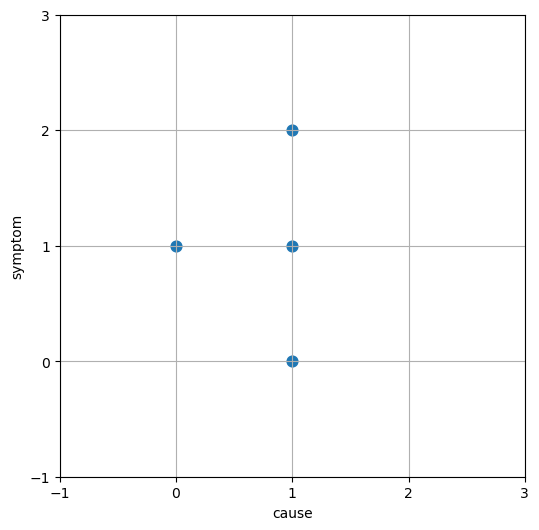

In [4]:
# We can use a scatter plot to show each document and the dimension of the token symptom and cause.
x_values = df_sample_BoW_matrix['cause']
y_values = df_sample_BoW_matrix['symptom']

plt.figure(figsize = [6, 6])
plt.scatter(x = x_values, y = y_values, marker='o', s = 60)

plt.xlabel('cause')
plt.xticks(range(-1, 4))
plt.ylabel('symptom')
plt.yticks(range(-1, 4))

plt.grid() 
plt.show();

In the plot above, each record is one of those points. For each record/point we could determine the most similar, the second mos similar, third most similar and so on. How could we determine similarity of each of these points to the other?

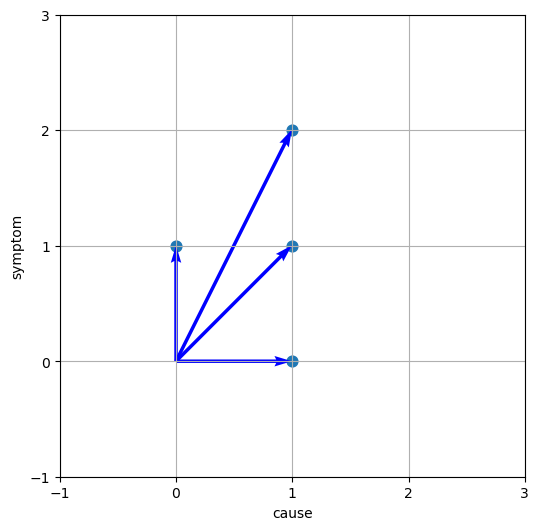

In [5]:
x_values = df_sample_BoW_matrix['cause']
y_values = df_sample_BoW_matrix['symptom']

plt.figure(figsize = [6, 6])
plt.scatter(x = x_values, y = y_values, marker='o', s = 60)

# Vector origin location 
origin_x = [0] 
origin_y = [0]

for point in range(0, len(df_sample_BoW_matrix)):
    plt.quiver(origin_x,origin_y, x_values[point], y_values[point], color='b', units='xy', scale=1) 

plt.xlabel('cause')
plt.xticks(range(-1, 4))
plt.ylabel('symptom')
plt.yticks(range(-1, 4))
    
plt.grid() 
plt.show();
# Could we use the the cosine of the angle?

In reality we don't do the similarity calculation for just two tokens. We do the similarity calculation for all tokens which may be in the thousands. 

There are various similarity metrics that can be used to measure the similarity between the points:
- Eucledian distance: Linear distance between points. Closes point is the most similar point.
- [Cosine Similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html): calculates the cosine of the angle. The point with the smallest angle is the most similar point. Cosine similarity is used in document similarity.
    
There are many other similarity metrics that can be used for different applications. Imagine doing this manually for every single text and for every dimension. This is where computers can help us calculate and sort the similarities.

References:
- https://en.wikipedia.org/wiki/Similarity_measure
- https://scikit-learn.org/stable/modules/metrics.html

# Example Data
[Return to Table of Contents](#Table-of-Contents)

The data used in the previos NLP notebook will be used to show how similarity ranking works. Recall that the unstructured data was normalized into the columns norm_text_wlemma and norm_text_wstemming.

### Data Loading

In [6]:
# Read dataframe.
df = pd.read_csv(r'.\output_data\df_norm_text.csv')

In [7]:
df.columns

Index(['Article', 'Date', 'Heading', 'NewsType', 'norm_text_wlemma',
       'norm_text_wstemming'],
      dtype='object')

In [8]:
df.sample(3).style.set_properties(subset=['Article', 'norm_text_wlemma', 'norm_text_wstemming'], **{'text-align':'left',
                                                       #'width': '800px', # If need to defin a width otherwise let it auto adjust.
                                                      }
                               ).hide(subset = ['Heading'], axis = 'columns').hide(axis = 'index') # Hides the column Heading and the index.

Article,Date,NewsType,norm_text_wlemma,norm_text_wstemming
"strong>KARACHI: Overseas Pakistani workers remitted 11.2 billion dollars in the first seven months (July - January) of FY 2015-16, showing a growth of 6 percent compared to 10.566 billion received during the same period in the preceding year.</strongDuring January 2016 the inflow of workers remittances amounted to 1462.87 million dollars which is 10.64% lower than December 2015 and 4.21% higher than January 2015.The country-wise details for the month of January 2016 show that inflows from Saudi Arabia, United Arab Emirates (UAE), United States of America (USA), United Kingdom, GCC countries including Bahrain, Kuwait, Qatar, and Oman and European Union countries amounted to 462.18 million, 313.32 million, 179.56 million, 172.53 million, 190.38 million and 28.64 million respectively as compared to the inflow of 452.81 million, 289.79 million, 197.39 million, 178.4 million, 162.31 million and 25.85 million respectively in January 2015.Remittances received from Norway, Switzerland, Australia, Canada, Japan and other countries during January 2016 amounted to 116.26 million together as against 97.19 million received in January 2015.",2/10/2016,business,strong karachi overseas pakistani worker remit billion dollar first seven month july january fy show growth percent compare billion receive period precede year strongduring january inflow worker remittance amount million dollar low december high january country wise detail month january show inflow saudi arabia united arab emirate uae united state america usa united kingdom gcc country include bahrain kuwait qatar oman european union country amount million million million million million million respectively compare inflow million million million million million million respectively january remittance receive norway switzerland australia canada japan country january amount million together million receive january,strong karachi oversea pakistani worker remit billion dollar first seven month juli januari fy show growth percent compar billion receiv period preced year strongdur januari inflow worker remitt amount million dollar lower decemb higher januari countri wise detail month januari show inflow saudi arabia unit arab emir uae unit state america usa unit kingdom gcc countri includ bahrain kuwait qatar oman european union countri amount million million million million million million respect compar inflow million million million million million million respect januari remitt receiv norway switzerland australia canada japan countri januari amount million togeth million receiv januari
"London: New York oil prices approached six-year lows Tuesday on worries over growing US stockpiles and after OPEC warned of a stubborn global supply glut, analysts said.US benchmark West Texas Intermediate (WTI) for April delivery slid to $42.63 a barrel -- touching the lowest level since March 11, 2009. It later stood at $42.70, down $1.18 from Monday´s close.Nearing midday in London, European benchmark Brent North Sea crude for May delivery fell $1.14 to $52.80 a barrel.Crude futures also dropped Monday on worries over growing US oil inventories, which already stand at record-high levels adding to the global oversupply.In addition, the market fell sharply after OPEC questioned the strength of last month´s rally, saying in a report that the price increase came ""despite the fact that global supply continued to exceed demand"".Traders are now eagerly awaiting Wednesday´s weekly US government report on crude reserves for the week to March 13.""Growing concerns that US crude stockpiles would see additional builds this week pushed prices lower,"" said Sucden analyst Kash Kamal.A Bloomberg News survey showed US crude stockpiles are expected to have increased by 3.3 million barrels to 452.2 million last week.US crude stockpiles have risen for nine weeks in a row to reach a record 448.9 million barrels on March 6.Singapore´s United Overseas Bank said

# Text Normalization
[Return to Table of Contents](#Table-of-Contents)

### Stopwords
[Return to Table of Contents](#Table-of-Contents)

In order to avoid issues you will need to use the same list of stopwords that was used for normalizing the text columns. That is if you will be performing search queries as the query text will also need to be normalized the same way as the target text.

In [9]:
# STOPWORDS USED FOR SAFETY OCCURRENCE CORPUS.
# Stopwords to add need to be evaluated by a SME familiar with the corpus.
stopwords_to_add = [''] # Example: ['building', 'employee','worker']

stopwords_custom = stopwords.words('english') + [x.lower() for x in stopwords_to_add]
#print(stopwords_custom) # Comment out to see list of stopwords_custom before removing the 'no'.

# In some cases you want to consider 2-grams especially with the word no.
# For example 'no fire'.  Removing the word no from the stopwords list allows this to occur.
remove_as_stopword = ['no', 'not']
stopwords_custom = list(filter(lambda w: w not in remove_as_stopword, stopwords_custom))
print(stopwords_custom)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [10]:
# The stopword list for NLTK and SciKit learn vary significantly.
# Recommended to review them to make sure there are no unintended consequences.
# Note that stopwords can also be called in the SciKit learn vectorization functions (e.g., TFIDFvectorizer)
# This can cause to inadvertently apply stopwords there as well.

### Text Normalization Functions
[Return to Table of Contents](#Table-of-Contents)

In order to avoid issues when performing similarity ranking given a query, you will need to use the same function to normalize the query and normalizing the text columns. In other words, if you will be performing search queries as the query text will also need to be normalized the same way as the target text.

In [11]:
# Normalization of text. 
def text_normalization(text, word_reduction_method):
    text = str(text) # Convert narrative to string.
    df = pd.DataFrame({'': [text]}) # Converts narrative to a dataframe format use replace functions.
    df[''] = df[''].str.lower() # Covert narrative to lower case.
    df[''] = df[''].str.replace(r"\d+", " ", regex = True) # Remove numbers
    df[''] = df[''].str.replace(r"[^\w\s]", " ", regex = True) # Remove special characters
    df[''] = df[''].str.replace(r"_", " ", regex = True) # Remove underscores characters
    df[''] = df[''].str.replace(r'\s+', ' ', regex = True) # Replace multiple spaces with single
    text = str(df[0:1]) # Extracts narrative from dataframe.
    tokenizer = RegexpTokenizer(r'\w+') # Tokenizer.
    tokens = tokenizer.tokenize(text) # Tokenize words.
    filtered_words = [w for w in tokens if len(w) > 1 if not w in stopwords_custom] # Note remove words of 1 letter only. Can increase to higher value as needed.
    if word_reduction_method == 'Lemmatization':
        lemmatizer = WordNetLemmatizer()
        reduced_words=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in filtered_words] # Lemmatization.  The second argument is the POS tag.
    if word_reduction_method == 'Stemming':
        stemmer = PorterStemmer() # Stemming also could make the word unreadable but is faster than lemmatization.
        reduced_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(reduced_words) # Join words with space.

def get_wordnet_pos(word): # Reference: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizer
    #"""Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Similarity Search Query Ranking Example
[Return to Table of Contents](#Table-of-Contents)

In this example we will use an input() function to query and find related articles within our data.

### Vectorization and Cosine Similarity Calculation Functions
[Return to Table of Contents](#Table-of-Contents)

Depending on the method and models used during the NLP steps, unstructured data can be converted to structured data. This can include transformation of unstructured data to structured data to a bag of words (BoW) model. The BoW model converts text to a matrix of words and terms (called tokens) and depending on the vectorization method used (e.g., count or TFIDF) the tokens are converted to a vector. Tokens can be lemmatized, stemmed, n-grams (combinations of words), sentences, and other forms depending on models used.

References:
- Pairwise Cosine Distance Explained for Document Data: https://www.machinelearningplus.com/nlp/cosine-similarity/

In [12]:
def input_bow_cos_calc(text, word_reduction_method): # Function only returns the top value.
    global cosine_value, weighted_value, index_value, inputtext, df_bow, bow, input_words_normalized 
    # Making global value so that it can be called outside of the function.
    
    # Note that depending on the size of the dataframe, 
    # 2-grams can significantly increases the Matrix size and if needed could increas min_df (e.g., to 0.0001).
    vectorizer = TfidfVectorizer(lowercase=True, analyzer='word', 
                                     ngram_range=(1, 2), stop_words = stopwords_custom, max_df=1.0, min_df=0.005)
    
    if word_reduction_method != 'Stemming':
        X = vectorizer.fit_transform(df['norm_text_wlemma']).toarray()
    if word_reduction_method == 'Stemming':
        X = vectorizer.fit_transform(df['norm_text_wstemming']).toarray()

    # Returns word vectors.
    features = vectorizer.get_feature_names_out()
    
    df_bow = pd.DataFrame(X, columns = features)
    
    inputtext = str(text)
    # Executing function to perform text normalization
    input_words_normalized = text_normalization(inputtext, word_reduction_method) 
    bow = vectorizer.transform([input_words_normalized]).toarray() # applying bow
    # Calculating the cosine_value of the Query_Text against every Target Text Row (i.e., Article) in the datafram.
    cosine_value = 1- pairwise_distances(df_bow, bow, metric = 'cosine')
    index_value = cosine_value.argmax() # Gets the index of the row with the highest value.
    return df['Article'].loc[index_value]

In [13]:
def rank_DATA(): # Fucntion returns all top 30 values ranked
    global df_fullinputdataresults
    # Defines and creates table for ranks
    df_cosine = np.round(cosine_value, 2)
    # Converting array to a pandas dataframe (table with index).
    df_cosine_table = pd.DataFrame({'cosine_value': df_cosine[:, 0]})
    # Concatenating the dataframes to show the results for Cosine Value (given inputtext), Original Data, norm Text and BoW
    df_fullinputdataresults = pd.concat([df_cosine_table, df], axis=1)
    # Sorting values with highest Cosine Value on the Top
    df_fullinputdataresults = df_fullinputdataresults.sort_values(by=['cosine_value'], ascending=False)
    # Selecting only top 10.
    df_fullinputdataresults = df_fullinputdataresults[:10] # Showeing top 10 results
    df_fullinputdataresults.insert(0, "Query_Text", inputtext, True)
    return (df_fullinputdataresults)

### Similarity Search Query using Input() Function
[Return to Table of Contents](#Table-of-Contents)

In the example below the input function is used to submit a text to perform a similarity search and ranking.

In [14]:
search_text = input(str('Input text here will rank against the query: '))
# TEST Query
# "bowling, fast, spin”

word_rdtn_method = 'Lemmatization' # Lemmatization or Stemming
print (f'The Vectorizer used is {word_rdtn_method}.')

# The input_bow_cos_calc function develops BoW word matrix scores (using 'COUNT' or 'TFIDF' vectorizers) and 
# fits the input text to the BoW matrix to calculate the cosine similarity.
# Note that depending on which parameters are picked the functions pick the correct columns (i.e., stemming or no stemming.)
input_bow_cos_calc(search_text, word_reduction_method = word_rdtn_method)

# Develops a table with all cosine scores and returns only the top 10 results.
rank_DATA() # Orders the records in order of cosine_value.

Input text here will rank against the query:  bowling, fast, spin


The Vectorizer used is Lemmatization.


,Query_Text,cosine_value,Article,Date,Heading,NewsType,norm_text_wlemma,norm_text_wstemming
1588,"bowling, fast, spin",0.20,"ISLAMABAD: The Pakistan Cricket Board (PCB) will be holding a specialized camp for spinners at the National Cricket Academy (NCA) from April 8 to 14.The week-long camp will be supervised by the spin bowling consultant of the national team, Mushtaq Ahmed, says a press release issued here.The bowlers will be imparted technical, tactical and physical training skills in the camp.Lectures from cricket icons will also be arranged for the players during the program.The players in the camp include Yasir Shah, Zafar Gohar, Arsal Sh.,<br/> Muhammad Asghar, Karamat Ali, Immad Wasim, Muhammad Nawaz, Bilal Asif, Hayat Ullah, Shadab Khan, Salman Fayyaz and Ahmad Shafiq.The performance of these bowlers will be monitored during the upcoming Pentangular Domestic Tournament.On the basis of the outcomes, a comprehensive specialized programme will also be arranged for spin bowlers later on.",4/7/2016,PCB camp for spinners from Friday,sports,islamabad pakistan cricket board pcb hold specialized camp spinner national cricket academy nca april week long camp supervise spin bowling consultant national team mushtaq ahmed say press release issue bowler impart technical tactical physical training skill camp lecture cricket icon also arrange player program player camp include yasir shah zafar gohar arsal sh br muhammad asghar karamat ali immad wasim muhammad nawaz bilal asif hayat ullah shadab khan salman fayyaz ahmad shafiq performance bowler monitor upcoming pentangular domestic tournament basis outcome comprehensive specialized programme also arrange spin bowler later,islamabad pakistan cricket board pcb hold special camp spinner nation cricket academi nca april week long camp supervis spin bowl consult nation team mushtaq ahm say press releas issu bowler impart technic tactic physic train skill camp lectur cricket icon also arrang player program player camp includ yasir shah zafar gohar arsal sh br muhammad asghar karamat ali immad wasim muhammad nawaz bilal asif hayat ullah shadab khan salman fayyaz ahmad shafiq perform bowler monitor upcom pentangular domest tournament basi outcom comprehens special programm also arrang spin bowler later
1323,"bowling, fast, spin",0.19,"strong>ISLAMABAD: Pakistans new bowling coach Azhar Mahmood believes Pakistan teams fast bowling attack is the best in the world at present, saying the pace trio of Mohammad Amir, Mohammad Irfan and Wahab Riaz is outstanding.</strongAzhar who has replaced bowling coach Mushtaq Ahmed (who has been rested for Asia Cup and World Twenty20 due to fatigue) said that Amir, Irfan and Wahab are among the best fast bowling attacks in the world at present.We have one of the best bowling sides in the world and Amir is a proven match-winner and then you add a seven footer Irfan who has an advantage of height, the pace battery of the side looks really exciting. Not to forget we have Wahab Riaz as well, Azhar was quoted as saying by indiatoday.intoday.in.He said Pakistan have Amirs variety, Irfans height and Riazs pace which makes for a threatening pace attack.The inclusion of Mohammad Sami only adds to the variety of the attack who can bowl at 145 kmph, he said.For Azhar a phone call from former teammate and current Pakistan head coach Waqar Younis was motivation enough to take up the assignment.I got a call from Waqar a week ago when I was playing Pakistans domestic T20 league. He asked me if I was interested in this role and I said yes in the blink of an eye. I had other commitments after the World T20 so this role suited me perfectly, he said.These guys have been working hard for the last two years with Waqar. My job is to only pass on my knowledge and skills and give them more confidence when it comes to executing bowling plans. I am enjoying each moment of mine with the Pakistan team and hopefully I can pass on my experience to the younger lot in the line up

The above dataframe adds a column on the text that was used as input to rank as well as the cosine similarity.

# Similarity Search Process Steps Description
[Return to Table of Contents](#Table-of-Contents)

Before running a similarity search, some form of data cleaning, preparation, and/or transofrmation may need to be performed (whcih is not shown in this notebook). Once the data is cleaned and loaded, there are six general steps that occur in the above example and functions whe performing a similarity ranking against a search query. The following steps are teh general steps performed in the previos NLP BoW model notebook and the functions input_bow_cos_calc() and rank_DATA() above. The steps are as follows:

1. Target text data that will be used for ranking is normalized (e.g., lemmatized and/or stemmed).
2. Input Text is submitted and cleaned using the same normalization as the target text.
3. Target Text is vectorized (i.e., bag of words matrix with TFIDF scores).
4. Input text is vectorized using the same method as the target text.
5. Calculation of similarity between the vectors (i.e., token dimensions) using a similarity metric (e.g., cosine).
6. Display the ranked data or the target output. The target output may vary depending on what the system is used for. For example we may only need the ranking of the top 10 records. Another example, in a Q&A system a the similarity between an input query and the text in the database but the output may only need to be the answer pair for the top ranked results.

The above process creates various dataframes and variables that can be explored to understand what the model is doing but not needed in deployment. This section provides some discussion on each step of the backend process.

### Step 1: Text Normalization
[Return to Table of Contents](#Table-of-Contents)

In the above example there are two features/columsn created with the normalized text column. One is called norm_text_wlemma and another norm_text_wstemming. Above, the dataframe "df" is the first dataframe to create the derived feature.

In [15]:
df.head(2)

Article  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Step 2: Input Text Normalized
[Return to Table of Contents](#Table-of-Contents)

This creates a variable and applies the text_normalization function. If you will use the norm_text_wlemma as target the input text needs to be cleaned using lemmatization. Same is true for stemming.

In [16]:
search_text

'bowling, fast, spin'

In [17]:
input_words_normalized

'bowling fast spin'

### Step 3: Target Text is Vectorized
[Return to Table of Contents](#Table-of-Contents)

In this step the BOW matrix with TFIDF scores is created for the target text. This is captured in variable df_bow. The matrix is highly dependent in the vectorizer parameters min_df and max_df as they along with stopwords control which tokens make it to the matrix.

In [18]:
print(df_bow.shape)
df_bow

(2692, 5556)


,aaron,aaron finch,ab,ab de,abandon,abbott,abdul,abdullah,ability,able,...,yuvraj singh,zafar,zalmi,zealand,zero,zimbabwe,zone,zulfiqar,zulfiqar babar,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025031,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4: Input Text is Vectorized
[Return to Table of Contents](#Table-of-Contents)

In this step the BOW matrix with TFIDF scores is created for the input text. This is captured in variable bow. Note that in this case with teh approach above we get an array with the for the input text based on the tokens of the df_bow. This means that tokens that are not in the corpus are not vectorized in the input text.

In [19]:
bow # Vectors of the input text.
# When using the sentence "Should I use a mask?" as input text the following is true.
# The bow variable fits to the bag of words matrix from the dataframe to the input text.
# The word "mask" is TFIDF value of 1.0 as it ignores the word use since it is not in the bag of words.

array([[0., 0., 0., ..., 0., 0., 0.]])

### Step 5: Calculation of Similarity
[Return to Table of Contents](#Table-of-Contents)

In this step the similarity between the input text and the record's target text is calculated and captured as an array in the variable cosine_value. The index of the array elements should match the index of the original dataframe. Note that in cases where the original dataframe was filtered or rows dropped not reseting the index may cause issues as the indexes may not match when merging for final results.

In [20]:
print(len(cosine_value))
cosine_value

2692


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Step 6: Display of Ranked Data
[Return to Table of Contents](#Table-of-Contents)

The final dataframe could include the merging of the cosine_value for each records, the original dataframe, even the vectors if need be. In the case above add to the original dataframe a column called "query_text", the cosine_value and is sorted in decreasing order. This is captured in the variable df_fullinputdataresults shown below. Note that the index is not in order and sorting by the index will take it to its original order.

A developer will need to decide what to show in a user interface and design which part of the data can be exported if any.

In [21]:
df_fullinputdataresults.head(5)

,Query_Text,cosine_value,Article,Date,Heading,NewsType,norm_text_wlemma,norm_text_wstemming
1588,"bowling, fast, spin",0.20,"ISLAMABAD: The Pakistan Cricket Board (PCB) will be holding a specialized camp for spinners at the National Cricket Academy (NCA) from April 8 to 14.The week-long camp will be supervised by the spin bowling consultant of the national team, Mushtaq Ahmed, says a press release issued here.The bowlers will be imparted technical, tactical and physical training skills in the camp.Lectures from cricket icons will also be arranged for the players during the program.The players in the camp include Yasir Shah, Zafar Gohar, Arsal Sh.,<br/> Muhammad Asghar, Karamat Ali, Immad Wasim, Muhammad Nawaz, Bilal Asif, Hayat Ullah, Shadab Khan, Salman Fayyaz and Ahmad Shafiq.The performance of these bowlers will be monitored during the upcoming Pentangular Domestic Tournament.On the basis of the outcomes, a comprehensive specialized programme will also be arranged for spin bowlers later on.",4/7/2016,PCB camp for spinners from Friday,sports,islamabad pakistan cricket board pcb hold specialized camp spinner national cricket academy nca april week long camp supervise spin bowling consultant national team mushtaq ahmed say press release issue bowler impart technical tactical physical training skill camp lecture cricket icon also arrange player program player camp include yasir shah zafar gohar arsal sh br muhammad asghar karamat ali immad wasim muhammad nawaz bilal asif hayat ullah shadab khan salman fayyaz ahmad shafiq performance bowler monitor upcoming pentangular domestic tournament basis outcome comprehensive specialized programme also arrange spin bowler later,islamabad pakistan cricket board pcb hold special camp spinner nation cricket academi nca april week long camp supervis spin bowl consult nation team mushtaq ahm say press releas issu bowler impart technic tactic physic train skill camp lectur cricket icon also arrang player program player camp includ yasir shah zafar gohar arsal sh br muhammad asghar karamat ali immad wasim muhammad nawaz bilal asif hayat ullah shadab khan salman fayyaz ahmad shafiq perform bowler monitor upcom pentangular domest tournament basi outcom comprehens special programm also arrang spin bowler later
1323,"bowling, fast, spin",0.19,"strong>ISLAMABAD: Pakistans new bowling coach Azhar Mahmood believes Pakistan teams fast bowling attack is the best in the world at present, saying the pace trio of Mohammad Amir, Mohammad Irfan and Wahab Riaz is outstanding.</strongAzhar who has replaced bowling coach Mushtaq Ahmed (who has been rested for Asia Cup and World Twenty20 due to fatigue) said that Amir, Irfan and Wahab are among the best fast bowling attacks in the world at present.We have one of the best bowling sides in the world and Amir is a proven match-winner and then you add a seven footer Irfan who has an advantage of height, the pace battery of the side looks really exciting. Not to forget we have Wahab Riaz as well, Azhar was quoted as saying by indiatoday.intoday.in.He said Pakistan have Amirs variety, Irfans height and Riazs pace which makes for a threatening pace attack.The inclusion of Mohammad Sami only adds to the variety of the attack who can bowl at 145 kmph, he said.For Azhar a phone call from former teammate and current Pakistan head coach Waqar Younis was motivation enough to take up the assignment.I got a call from Waqar a week ago when I was playing Pakistans domestic T20 league. He asked me if I was interested in this role and I said yes in the blink of an eye. I had other commitments after the World T20 so this role suited me perfectly, he said.These guys have been working hard for the last two years with Waqar. My job is to only pass on my knowledge and skills and give them more confidence when it comes to executing bowling plans. I am enjoying each moment of mine with the Pakistan team and hopefully I can pass on my experience to the younger lot in the line up

# ALTERNATIVE APPROACHES
[Return to Table of Contents](#Table-of-Contents)

There are other approaches that may leverage supervised ML, unsupervised ML and deep learning. Below are some thoughts on some other approaches that could be explored, evaluated and compared for model performance and computational requirements.

# Similarity Search Improvement: Tokens of Input Search
One of the disadvantages of cosine similarity is that for large dataframes (i.e., above 1 million records) and depending on the parameters of the vectorization used to calculate the BOW matrix, the computational requriements may be too high. 

One approach that could reduce computational requirements in these cases is to first calculate the BOW matrix tokens (e.g., text, words, terms, phrases, sentences) using the input text and then fit the records text data to that BOW. This will greatly limit the amount of tokens used in the vectorization by removing tokens that are not of interest of the query. This may increase performance but potentially at the cost of lower accuracy as it will be removing many tokens from the calculation.

Note in this approach the order of the creation of the BoW matrix changes and the function input_bow_cos_calc_2 has been modified to take this change into account. In this case the BoW matrix is generated using the words and tokens of those words found in the input text query rather than on the full text of the dataframe. The dataframe vectors are then calculated only on the words of the input text. This results in a much smaller BoW matrix. The rest of the process and functions are exactly the same.

However, one significant difference is that, for those articles that have words in the query, the resulting cosine score tends to be much higher. This is because the calculation of TFIDF values considers the total number of words within an article. For example, the term frequency is calculated by the division of how many times the term appears in the narrative divided by total number of terms. Total number of terms is determined by those terms modeled in the matrix and not all actual words. In this approach, since the total number of words is significantly reduced by only using the words of the query input text the TFIDF vectors results in much larger numbers. Using the other approach, penalizes or suppreses long articles while this approach may tends to ignore lenght of the article. 

In [22]:
def input_bow_cos_calc_2(text, word_reduction_method): # Function only returns the top value.
    global cosine_value, weighted_value, index_value, inputtext, df_bow, bow, input_words_normalized 
    # Making global value so that it can be called outside of the function.
    
    # Note that depending on the size of the dataframe, 
    # 2-grams can significantly increases the Matrix size and if needed could increas min_df (e.g., to 0.0001).
    vectorizer = TfidfVectorizer(lowercase=True, analyzer='word', 
                                     ngram_range=(1, 2), stop_words = stopwords_custom, max_df=1.0, min_df=0.005)

    inputtext = str(text)
    # Executing function to perform text normalization
    input_words_normalized = text_normalization(inputtext, word_reduction_method)

    X = vectorizer.fit_transform(pd.Series(input_words_normalized)).toarray()

    # Returns word vectors.
    features = vectorizer.get_feature_names_out()
    bow = pd.DataFrame(X, columns = features) # BoW Matrix for input text.
    
    # Vectorization to create the BoW matrix and tokens based on the input text tokens only.
    if word_reduction_method != 'Stemming':
        df_bow = vectorizer.transform(df['norm_text_wlemma']).toarray() # applying bow
    if word_reduction_method == 'Stemming':
        df_bow = vectorizer.transform(df['norm_text_wstemming']).toarray() # applying bow
       
    # Calculating the cosine_value of the Query_Text against every Target Text Row (i.e., Article) in the datafram.
    cosine_value = 1- pairwise_distances(df_bow, bow, metric = 'cosine')
    index_value = cosine_value.argmax() # Gets the index of the row with the highest value.
    return df['Article'].loc[index_value]

In [23]:
# Performing a Search query.
search_text = input(str('Input text here will rank against the query: '))
# TEST Query
# "bowling, fast, spin”

word_rdtn_method = 'Lemmatization' # Lemmatization or Stemming
print (f'The Vectorizer used is {word_rdtn_method}.')

# The input_bow_cos_calc_2 function develops BoW word matrix scores (using 'COUNT' or 'TFIDF' vectorizers) and 
# fits the input text BoW matrix to the data  to calculate the cosine similarity.
input_bow_cos_calc_2(search_text, word_reduction_method = word_rdtn_method)

# Develops a table with all cosine scores and returns only the top 10 sorted.
rank_DATA() # Orders the records in order of cosine_value.

Input text here will rank against the query:  "bowling, fast, spin”


The Vectorizer used is Lemmatization.


,Query_Text,cosine_value,Article,Date,Heading,NewsType,norm_text_wlemma,norm_text_wstemming
1112,"""bowling, fast, spin”",0.85,"PRETORIA: South African fast bowler Kagiso Rabada took a career-best 6-101 to leave England on 318 for eight wickets at tea and trailing by 157 runs on the third day of the fourth and final Test at Centurion Park on Sunday.Rabada had decimated the England middle-order before lunch, claiming the big wicket of Ben Stokes (33) during a rain-hit middle session, with the visitors reeling after the Proteas posted 475 in their first innings.Moeen Ali (45 not out) provided a steady hand in response and along with Stuart Broad (four not out) will look to close the gap on a wicket that was starting to favour the bowlers.England have already wrapped up the series with an unassailable 2-0 lead.Stokes looked at his fluent best before he was caught at slip by Hashim Amla shortly after South Africa, who posted a first innings total of 475, had taken the new ball.Chris Woakes (26) was the only other wicket to fall in the session and could count himself unlucky, an edge off the part-time spin of JP Duminy hitting the thigh of wicketkeeper Quinton de Kock and looping to Dean Elgar at slip.Rabada had removed Joe Root (76), James Taylor (14) and Jonny Bairstow (0) in quick succession in the minutes before lunch.Root had looked set for a big score but was caught by De Kock having a drive at Rabada after he had brought up his fourth half-century of the series.Taylor fell to the same combination trying to pull a short ball, before Bairstow got a feather edge through to De Kock.Rabada is just the second player in history to take six wickets in an innings in both tests and One-Day Internationals before the age of 21, joining Pakistan great Waqar Younis on that short list.Captain Alastair Cook (76) was the first wicket to fall on day three when he was caught behind by De Kock off the bowling of fast bowler Morne Morkel.Coming around the wicket to the left-hander, Morkel angled the ball into Cook´s body and induced an edge as it moved away slightly off the wicket.It left Cook still 41 runs shy of becoming the first England batsman to reach 10,000 test runs after he had put on 99 for the third wicket with Root. (Reuters)",1/24/2016,Rabada grabs six as England falter,sports,pretoria south african fast bowler kagiso rabada take career best leave england eight wicket tea trail run third day fourth final test centurion park sunday rabada decimate england middle order lunch claim big wicket ben stokes rain hit middle session visitor reel protea post first inning moeen ali not provide steady hand response along stuart broad four not look close gap wicket start favour bowler england already wrap series unassailable lead stokes look fluent best caught slip hashim amla shortly south africa post first inning total take new ball chris woakes wicket fall session could count unlucky edge part time spin jp duminy hit thigh wicketkeeper quinton de kock loop dean elgar slip rabada remove joe root james taylor jonny bairstow quick succession minute lunch root look set big score caught de kock drive rabada brought fourth half century series taylor fell combination try pull short ball bairstow get feather edge de kock rabada second player history take six wicket inning test one day international age join pakistan great waqar younis short list captain alastair cook first wicket fall day three caught behind de kock bowling fast bowler morne morkel come around wicket left hander morkel angle ball cook body induced edge move away slightly wicket left cook still run shy become first england batsman reach test run put third wicket root reuters,pretoria south african fast bowler kagiso rabada took career best leav england eight wicket tea trail run third day fourth final test centurion park sunday rabada decim england middl order lunch claim big wicket ben stoke rain hit middl session visitor reel protea post first inning moeen ali not provid steadi hand

# Considerations for Synonyms

Cosine Similarity could consider Synonyms using a synonym libary (e.g., NLTK or Gensim). This improvement could be implemented by iterating through the tokens of the input text and appending any synonyms (or top synonyms) of these tokens to the end of the input text. Although not perfect, this approach would allow the cosine similarity ranking to take into account synonyms within the similarity search query.

In [25]:
# Function to find synonyms of a string of text.
def get_synonyms(text_string):
    synonyms = [] # Empty list.
    text_string_list = text_string.split(' ') # Split string by into separate words
    for element in text_string_list: # Iterates through the list of words.
        for syn in wordnet.synsets(element): # Iterates through the each synonym of a word.
            for lemma in syn.lemmas(): # Finds the lemmatized version of the synonym.
                synonyms.append(lemma.name()) # Appends the lemmatized version of the synonym into the synonym list.
    synonyms = list(set(synonyms)) # Removes duplicates using set and converts back to list.
    return synonyms

Examples to run in input query:
- Example 1: student, teach
- Example 2: bowling, fast, spin

In [29]:
text_string = input("Write string to find synonyms: ")
synonyms = get_synonyms(text_string)
' '.join(synonyms)

Write string to find synonyms:  student, teach


'Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach'

#### Using the synonyms within the search query functions defined in previous sections.
This can be used with either the input_bow_cos_calc or the alternative approach input_bow_cos_calc_2. 

In [34]:
search_text = input(str('Input text here will rank against the query: '))
synonyms = get_synonyms(text_string)
search_text = search_text + ' '.join(synonyms)

Input text here will rank against the query:  bowling, fast, spin


In [36]:
# Performing a Search query.
search_text = input(str('Input text here will rank against the query: '))
synonyms = get_synonyms(text_string)
search_text = search_text +' ' + ' '.join(synonyms)
# TEST Query
# "bowling, fast, spin”

word_rdtn_method = 'Lemmatization' # Lemmatization or Stemming
print (f'The Vectorizer used is {word_rdtn_method}.')

# The input_bow_cos_calc_2 function develops BoW word matrix scores (using 'COUNT' or 'TFIDF' vectorizers) and 
# fits the input text BoW matrix to the data  to calculate the cosine similarity.
input_bow_cos_calc_2(search_text, word_reduction_method = word_rdtn_method)

# Develops a table with all cosine scores and returns only the top 10 sorted.
rank_DATA() # Orders the records in order of cosine_value.

Input text here will rank against the query:  bowling, fast, spin


The Vectorizer used is Lemmatization.


Query_Text  \
2233  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
2446  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
2417  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
2252  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
1263  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
1275  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
1579  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
1495  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
2055  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   
2156  bowling, fast, spin Edward_Teach Thatch instruct Edward_Thatch learn Teach Blackbeard teach   

      cosine_value  \
2233          0.53   
2446          0.51   
2417          0.51   
2252          0.48   
1263          0.39   
1275          0.37   
1579          0.36   
1495          0.36   
2055          0.36   
2156          0.36   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Supervised ML based methods

Supervised ML based methods could be used to develop a  recommendation like system where using a classification model (e.g., SVM) could be used to identify similar records. Unsupervised ML based methods: could use a clustering algorithm to find cluster of similar records.

Other methods such as those that use word embeddings, sentence embeddings, sentence transformers, large language models (e.g., word2Vec, BERT, T5, LLMs, huggingface models, etc.) may provide better outputs after fine-tuning for the required task (sentiment analysis, summarization, classification, text/image generation, question answering, etc.). However, the computational
Other non-traditional approaches may include combining approaches. For example, one may first run clustering algorithm to limit the amount of data and then use a similarity calculation. However, these combined methods would need to be benchmarked to compare performance.

In a NLP application, user options can be provided that either provide use of different models and changing parameters or preset options that change parameters. For example, some Generative-AI LLM based tools have provided users with options such as "creative" "balanced" or "precise". Presumably these options change the parameters that affect text generation.

# References
[Return to Table of Contents](#Table-of-Contents)

The following are references on use cases for similarity search ranking:
- Pairwise Cosine Distance Explained for Document Data: https://www.machinelearningplus.com/nlp/cosine-similarity/
- https://medium.com/swlh/a-chatbot-in-python-using-nltk-938a37a9eacc
- https://towardsdatascience.com/how-to-create-a-chatbot-with-python-deep-learning-in-less-than-an-hour-56a063bdfc44
- https://www.youtube.com/watch?v=Z9V2gxc3Z5Q&feature=emb_logo; https://github.com/abhishek305/PyBot-A-ChatBot-For-Answering-Python-Queries-Using-NLP
- https://mathcodelife.com/creating-a-chat-log-for-a-game-using-tkinter-in-python/
- http://effbot.org/tkinterbook/text.htm

Other similar searches such as Semanting Search, Information Retrieval and Transformer References:
- https://zelros.medium.com/from-bag-of-words-to-transformers-10-years-of-practical-natural-language-processing-8ccc238f679a
- https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search.py
- https://www.sbert.netexamples/applications/semantic-search/README.html
- https://www.sbert.net/examples/applications/semantic-search/README.html
- https://www.sbert.netexamples/applications/information-retrieval/README.html
- https://www.sbert.net/examples/applications/information-retrieval/README.html
- https://colab.research.google.com/drive/1l6stpYdRMmeDBK_vw0L5NitdiAuhdsAr?usp=sharing
- https://www.shaip.com/blog/large-language-models-llm/

Topic Modeling with LDA
https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

Text Clustering with K-Means
- https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html
- https://medium.com/@lucasdesa/text-clustering-with-k-means-a039d84a941b
- https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd

DBSCAN Clustering Algorithm
- https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62
- https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
- https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

Principal Component Analysis (PCA): 
- https://github.com/DhruvilKarani/PCA-blog-notebook/blob/master/PCA.ipynb
- https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
- https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-7-unsupervised-learning-pca-and-clustering-db7879568417
- https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6
- https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-kmeans-clustering-pca-b7ba6fafa74

High Dimensional Clustering w/ TSNE and DBSCAN
- https://towardsdatascience.com/high-dimension-clustering-w-t-sne-dbscan-dcec77e6a39b
- https://link.medium.com/zNc9QSQj0cb
- https://github.com/dougfoo/machineLearning/blob/master/covid/COVID-global-clustering.ipynb

t-distributed stochastic neighbor embedding (TSNE):
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a
- https://distill.pub/2016/misread-tsne/
- https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

# NOTEBOOK END